In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [14]:
sc._settings.ScanpyConfig.n_jobs = -1

In [2]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [27]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/MRL_CODEX/quantification/Suppl.Table2.CODEX_paper_MRLdatasetexpression.csv')
labels = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/MRL_CODEX/quantification/mmc2_labels.csv', sep=';')

In [28]:
df['Imaging phenotype cluster ID'] = df['Imaging phenotype cluster ID'].astype(str)

In [29]:
mapping_dict = labels.set_index('X-shift cluster ID')['Imaging phenotype (cell type)'].to_dict()

In [30]:
df['Imaging phenotype cluster ID'] = df['Imaging phenotype cluster ID'].astype(int).map(mapping_dict)

In [31]:
df.drop(columns=['Z.Z', 'blank_Cy3_cyc15', 'blank_Cy5_cyc15', 'niche cluster ID', 'sample_Xtile_Ytile'], inplace=True)
df.rename(columns={'Imaging phenotype cluster ID': 'cell_type'}, inplace=True)
df = reorder_columns(df, 'cell_type', 'MHCII')
df = reorder_columns(df, 'Y.Y', 'MHCII')
df = reorder_columns(df, 'X.X', 'MHCII')
df.rename(columns={'X.X': 'x', 'Y.Y': 'y'}, inplace=True)

In [32]:
df

,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,CD8a,...,B220,ERTR7,CD35,CD2135,CD44,NKp46,MHCII,x,y,cell_type
0,1577.675415,-154.301758,130.692184,-4.168493,560.691345,-504.231476,854.670105,-631.294189,385.935242,242.400131,...,457.675629,840.192688,120.959267,-1.224402,422.408691,515.130066,6712.812988,10,70,CD11c(+) B cells
1,1017.838440,-93.069397,144.076584,40.010998,885.595520,-391.357544,62.764454,-474.201172,-469.634583,482.660309,...,1217.684692,682.790100,53.276588,20.090719,448.701660,171.880310,2024.678711,1000,294,CD11c(+) B cells
2,5978.459961,-330.099365,139.631744,-82.840302,1747.897583,-395.508820,954.326782,-1026.204468,3744.718262,1287.204956,...,666.266418,753.930969,601.395996,161.183090,2229.804443,512.220764,8647.193359,1003,107,CD11c(+) B cells
3,6119.109375,-54.384808,-768.871704,25.625927,1065.311890,-485.535431,538.404175,-611.836426,865.842590,554.589905,...,2261.370361,249.342300,244.572174,135.403366,665.720459,351.108246,4838.463379,1003,113,CD11c(+) B cells
4,6272.474609,-235.512405,74.058075,-101.729919,1186.295044,-782.744995,1261.625366,-915.565552,1361.536011,258.848846,...,1058.446533,-267.946808,211.492844,-41.061123,2065.742676,259.003235,5092.891602,1003,148,CD11c(+) B cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734096,-688.832153,-219.017471,260.814728,-102.244308,191.481277,-780.639587,-386.735748,-1022.373962,-136.550278,-667.158691,...,-358.940735,172.902756,194.764572,56.864479,-164.587204,-9.616314,958.904358,955,482,CD4(+)MHCII(+)
734097,-418.201904,-349.080231,-212.614212,-602.782959,-114.562439,-1160.290161,-889.838257,-1013.993713,-917.420166,-667.360107,...,3346.783691,2857.673828,869.343933,304.062866,584.659729,788.070068,756.565369,960,853,CD4(+)MHCII(+)
734098,521.979492,1831.827148,244.709000,118.634224,778.191040,151.496323,1562.585083,526.572327,769.504578,630.214294,...,849.758118,958.845459,148.190170,138.270584,967.803772,760.188660,146.096573,97,517,CD4(+)MHCII(+)
734099,-944.904663,-127.192131,-309.472839,72.905830,373.572662,-287.188904,-357.778961,-386.898590,-20.499031,2619.047852,...,442.771057,-48.994541,396.196289,163.886475,-164.626266,31.346064,617.386902,975,149,CD4(+)MHCII(+)


In [33]:

df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/MRL_CODEX/quantification/processed/Suppl.Table2.CODEX_paper_MRLdatasetexpression_cleaned.csv', index=False)

In [36]:
X_columns = df.columns[:df.columns.get_loc('cell_type')]
obs_columns = df.columns[df.columns.get_loc('cell_type'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [39]:
adata.raw = adata
adata.X = np.arcsinh(adata.X/150)
adata.layers['zscore'] = z_score_normalization(adata.X)

In [34]:
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

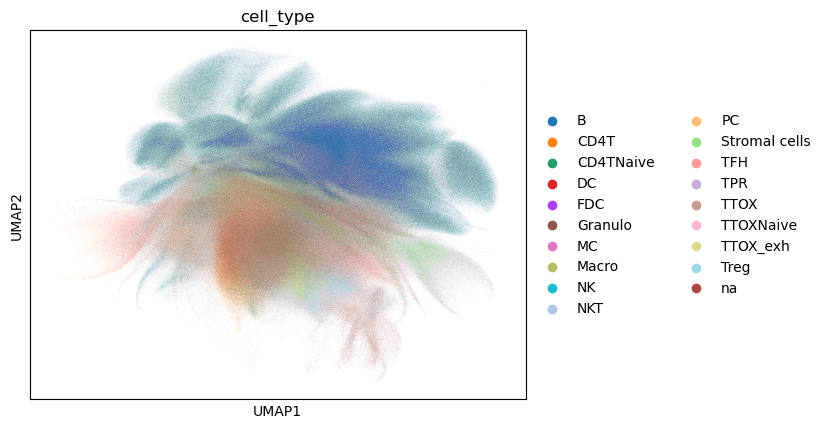

In [18]:
sc.pl.umap(adata, color='cell_type')

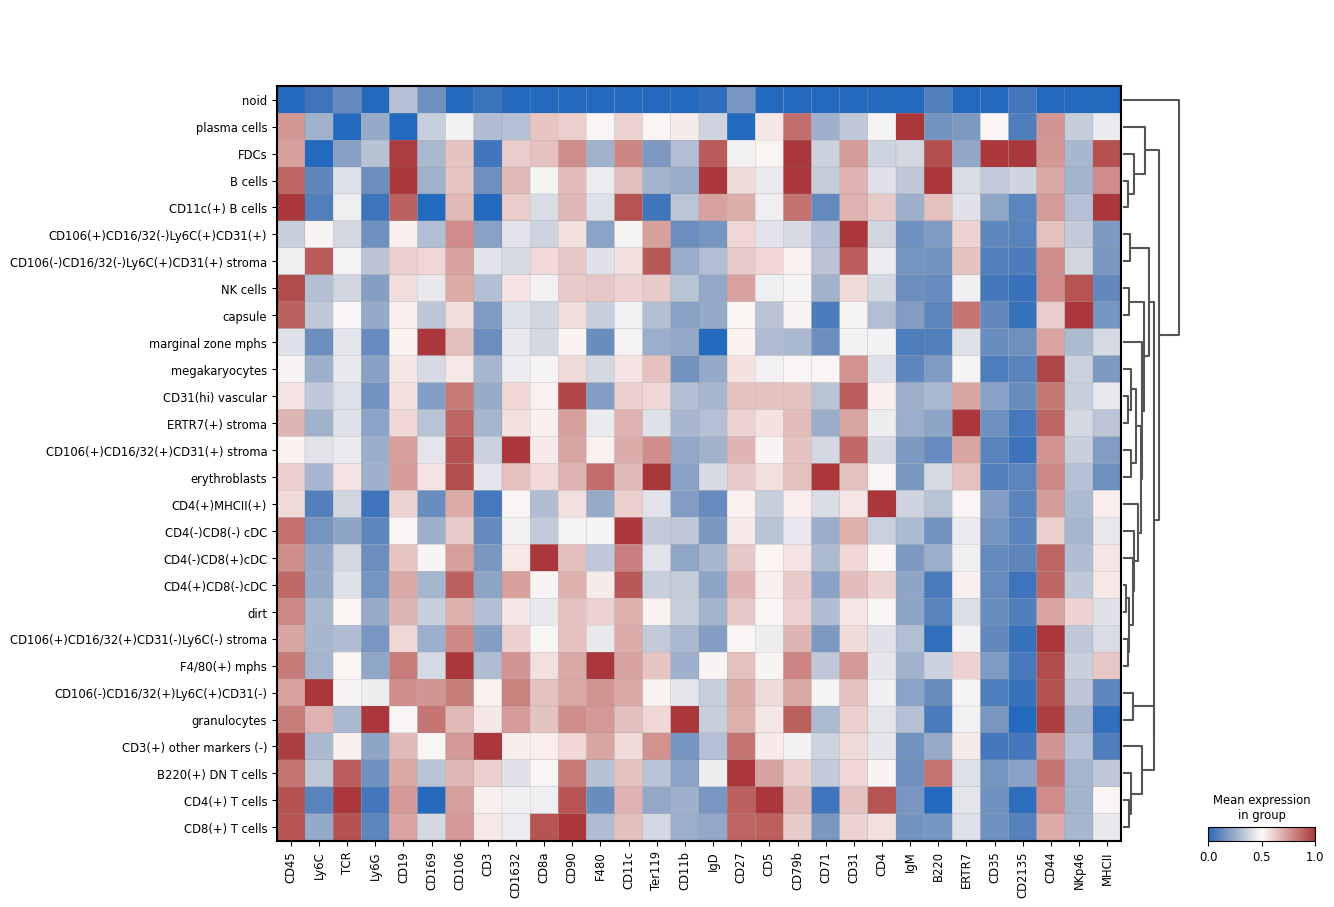

In [43]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Cell types seem to be not really properly assigned. CD2135 does not exist. Cannot really trust these assigned celltypes

In [44]:
sc.tl.rank_genes_groups(adata, groupby='cell_type' , method='wilcoxon')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:459: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups

In [45]:
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.2, max_out_group_fraction = 1, key = 'rank_genes_groups', key_added='rank_genes_groups_filtered')

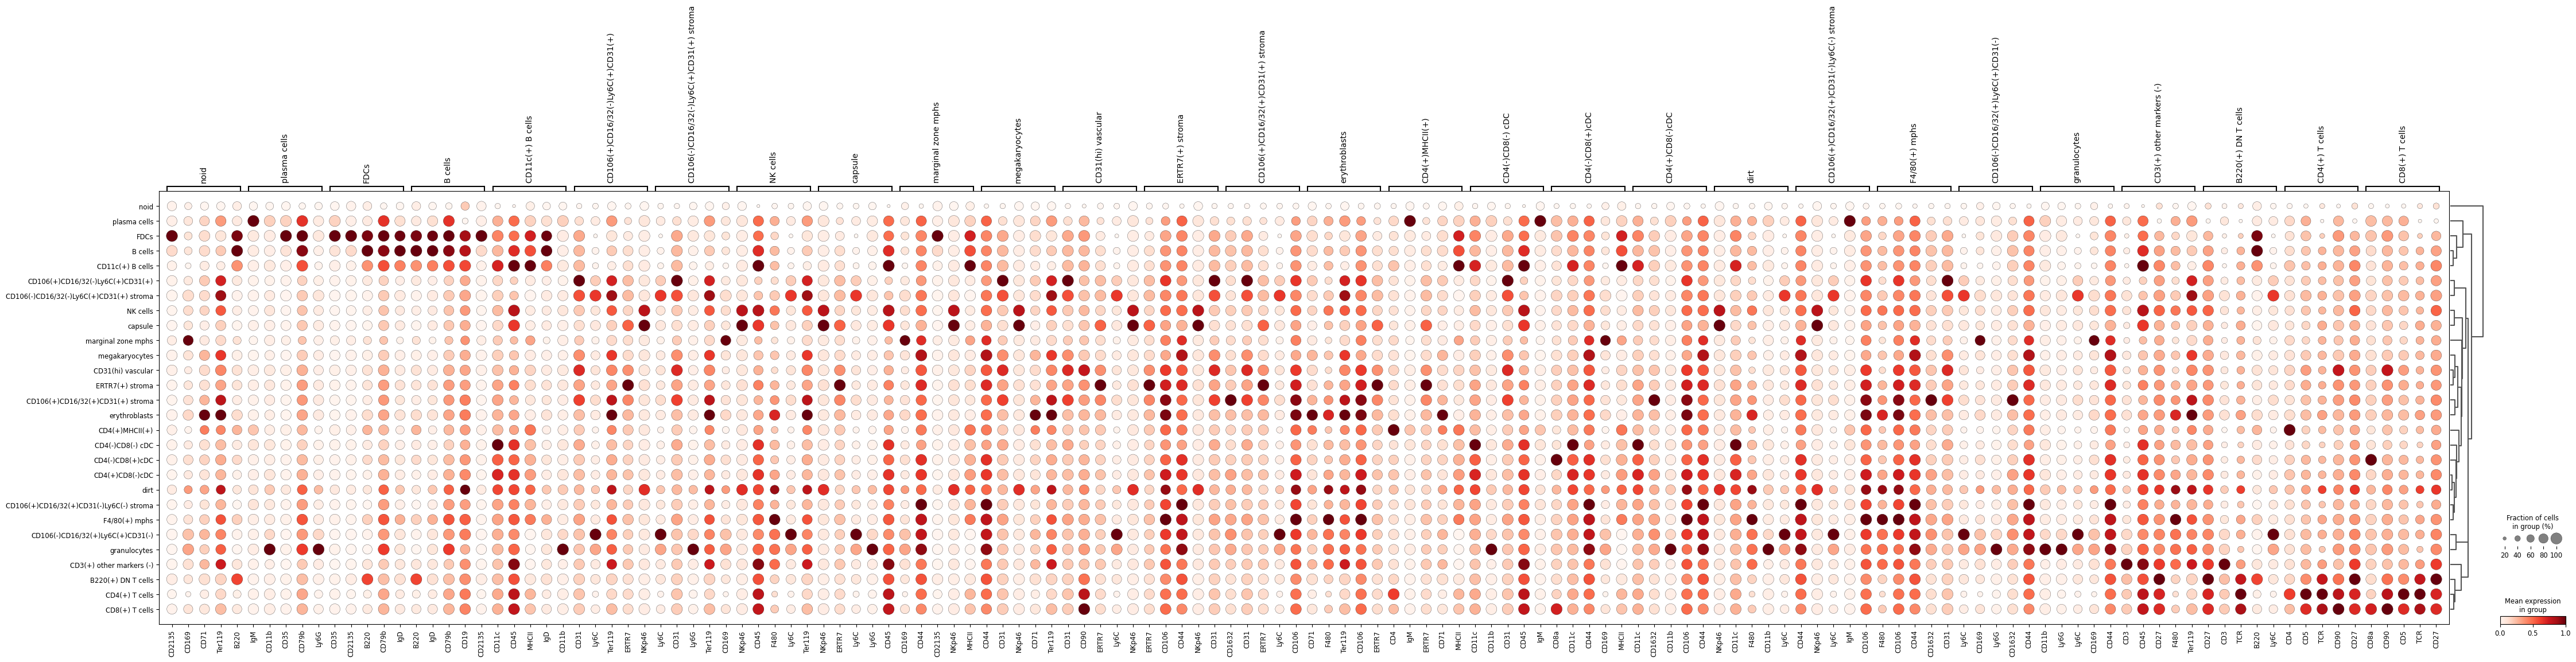

In [46]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups')

categories: B220(+) DN T cells, B cells, CD3(+) other markers (-), etc.
var_group_labels: B220(+) DN T cells, B cells, CD3(+) other markers (-), etc.


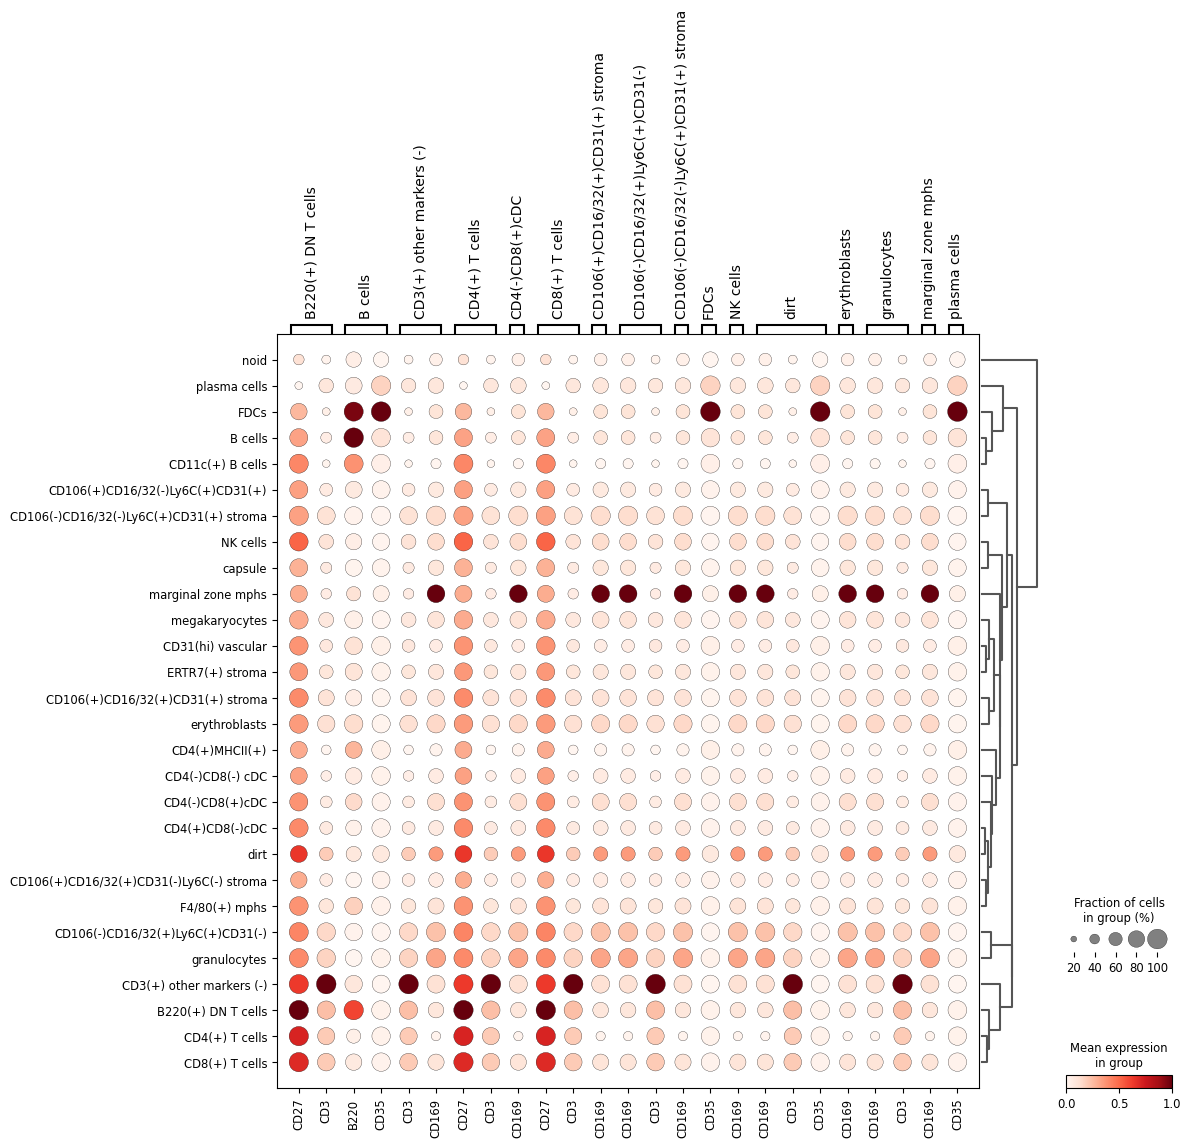

In [47]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale='var', key='rank_genes_groups_filtered')